# **Kaggle Machine Learning Project - TB12 Sucks Ass Edition**

This Machine Learning Project can be found on Kaggle at: https://www.kaggle.com/c/titanic <br>
Our goal is to become comfortable with reading & preparing unclean data utilizing Python and with this data find the best Predictive Algorithm on who will survive the ship sinking.


## **Reading & Exploring Our Data** 

The first step of this project is to read in and explore our data. We will be pointing out trends that we notice, as this will be important for when we prepare the data. 

### <u>Import Libraries

In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Desktop/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Linerar Algebra
import numpy as np 

# Data Structure
import pandas as pd 

# Data Visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Machine Learning Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### <u>Setting Testing/Training Data


We first want to convert our Testing and Training datasets into Pandas Dataframes. When we utilize this Dataframe, we will be able to run Pandas Operations on these tables.

In [2]:
#Import Testing Data
filename = 'test.csv'
test_data = pd.read_csv(r"C:\Users\krstob\Desktop\Kaggle-Titanic-ML-Project\Kris\Titanic_Datasets\test.csv")
print('Loaded data file {0} with {1} rows'.format(filename, len(test_data)))

#Import Training Data
filename = 'train.csv'
train_data = pd.read_csv(r"C:\Users\krstob\Desktop\Kaggle-Titanic-ML-Project\Kris\Titanic_Datasets\train.csv")
print('Loaded data file {0} with {1} rows'.format(filename, len(train_data)))

Loaded data file test.csv with 418 rows
Loaded data file train.csv with 891 rows


### <u>Data Exploration - Basic/Missing Data

Let's first explore our training set of data. I would like to see our different variables, the type (char/num), as well as the overall trends. <br>
After this, I will graph the percentage of survived to particular variables to know what to dive into for our ML Models. 

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


By running the Pandas Describe summary, we can see that the mean (average) survived is apprixmately 38%. 

In [5]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


By looking at our training data, we can notice a few important things:
1. There are missing values that we will need to take care of (NaN)
2. There are a few variables that will need to be converted to Numeric (Sex, Ticket)
3. There are some features that have wide ranges, so we wil need to convert them into a similar scale

**Let's first look into the missing values**. I am curious to see what variables have a specific percentage of their rows missing. 

In [6]:
#We need to check how many Values are Null using the isnull() function
total_missing = train_data.isnull().sum().sort_values(ascending=False)
total_missing.head(5)

#Find the total values there
total = train_data.notnull().sum().sort_values(ascending=False)
total.head(5)

#Find the percent of missing values per variable
Percent = train_data.isnull().sum()/train_data.isnull().count()*100
Percent.sort_values(ascending=False).head(5)

#Round these to one decimal place for less storage
Percent_Rounded = (round(Percent,1)).sort_values(ascending=False)

#Plot the Missing Data [Total Missing, Percentage Missing] With a Concatination of two Columns
Missing_Data = pd.concat([total, total_missing, Percent_Rounded], axis = 1, keys=['Non Missing Values', 'Total Missing Values', '% Missing'], sort=True)
Missing_Data



,Non Missing Values,Total Missing Values,% Missing
Age,714,177,19.9
Cabin,204,687,77.1
Embarked,889,2,0.2
Fare,891,0,0.0
Name,891,0,0.0
Parch,891,0,0.0
PassengerId,891,0,0.0
Pclass,891,0,0.0
Sex,891,0,0.0
SibSp,891,0,0.0


**What Does This Tell Us?:** The Embarked only has two missing values. Age has about 20% missing, and, the Cabin has 77% missing which is a large amount. 

### <u>Data Exploration: Features

I now want to explore what features would contribute to a high survival rate (*or likewise a low survival rate*). <br>
We have the following variables to look into:
1. Age
2. Cabin
3. Embarked 
4. Fare
5. Parch
6. Pclass
7. Sex
8. SibSp
9. Survived
10. Ticket

I do not believe that Ticket, Name, and PassengerId will be correlated with an affect on survival rate, but this will be taken into consideration for performance boosts.

 <br>**Let's First Look into Age & Sex:**

I would like to plot Age vs Sex to see if there are any survival correlations

Text(0.5, 1.0, 'Men')

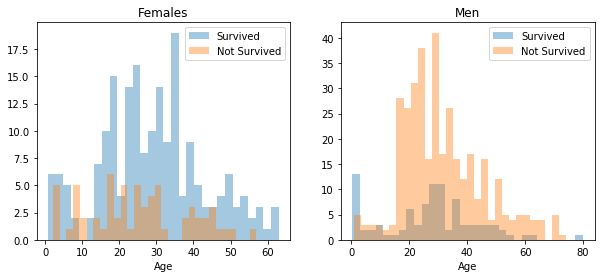

In [7]:
#Create a Blank Graph Canvas, 2 Graphs (Female/Male)
Survived = 'Survived'
Not_Survived = 'Not Survived'
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

#Set Women/Male Variable to it's value in the Training Dataset
Women = train_data[train_data['Sex'] == 'female']
Male = train_data[train_data['Sex'] == 'male']

#For the First Graph, plot the Ammount of Women who Survived Dependent on their Age
ax = sns.distplot(Women[Women['Survived']==1].Age.dropna(), bins=30, label = Survived, ax = axes[0], kde = False)

#For the First Graph, layer the Ammount of Women who did not Survive Dependent on their Age
ax = sns.distplot(Women[Women['Survived']==0].Age.dropna(), bins=30, label = Not_Survived, ax = axes[0], kde = False)

#Display a Legend for the First Graph
ax.legend()
ax.set_title('Females')

#For the Second Graph, plot the Ammount of Men who Survived Dependent on their Age
ax = sns.distplot(Male[Male['Survived']==1].Age.dropna(), bins=30, label = Survived, ax = axes[1], kde = False)

#For the Second Graph, layer the Ammount of Men who did not Survive Dependent on their Age
ax = sns.distplot(Male[Male['Survived']==0].Age.dropna(), bins=30, label = Not_Survived, ax = axes[1], kde = False)

#Display a Legend for the Second Graph
ax.legend()
ax.set_title('Men')

What does this graph show us?
1. Females Between the Ages of ~18-35 had a higher chance of survival
2. Males between 20-32 had a higher chance of survival
3. Female babies/kids betwen 1 - 8 years also had a decent survival rate <br>

<br>**Let's Now Look at Embarked, PClass, & Sex**

To analyze the relationship between Embarked, Pclass, Sex, and Survived, we will use Seaborn's FacetGrid. Facetgrid is a multi-plot grid for conditional relationships: (In our case, Embarked = S, C & Q)
<br>
<br>The documentation for FacetGrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

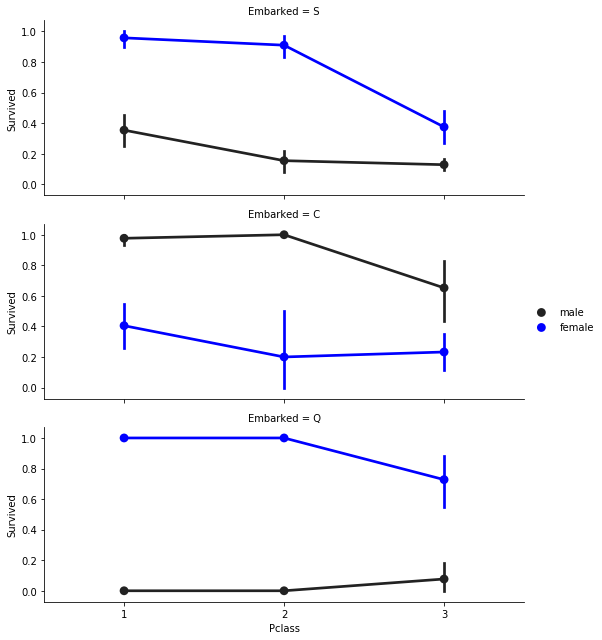

In [8]:
#Creating a FacetGrid Empy 1 x 3 Plot so we can overlay our data
#It creates three rows, as Embarked as 3 different options in the dataset
FacetGrid = sns.FacetGrid(train_data, row = 'Embarked', height = 3, aspect = 2.5)

#Placing a Point Plot on our Facet Grid. Pclass is our X Axis, Survived is the Y Axis, and Sex is the two different lines
#.Map is applything the plotting function to each facet's subset of data
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = None, order = None, hue_order = None, style = 'ticks', color='b')

#Adding a Legend for Readability
FacetGrid.add_legend()


What does this graph show us?
1. Men have a high survival percentage on Port C, but very low on Port Q and quite low on Port S
2. Women havae a very high Survival Percentage on Port Q, and high percentage on Port S
3. Women Have a low survival perventage on Port C

<br>**Let's Take a Deeper Look Specifically into PClass:**

I first would like to simply create a bar chart for Survived Dependent on Pclass. This should should us if being in a specific Pclass helps with your survival chances
<br>Seaborn Barchart Documentation: https://seaborn.pydata.org/generated/seaborn.barplot.html

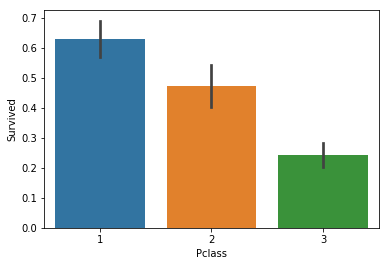

In [9]:
#Creating Seaborn Barchart 
sns.barplot(x='Pclass', y='Survived', data=train_data)

As the above diagram illustrates, the higher the Pclass, the larger the percentage of people who survived. 
<br>Let's now take a deeper look into this by comparing Pclass, Survived, and Age

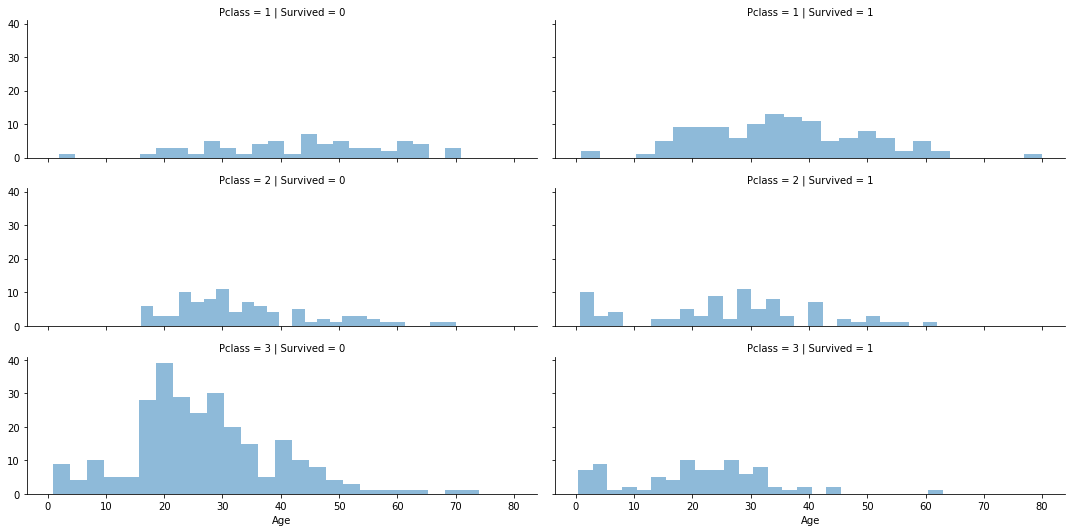

In [10]:
#First we use Facet Grid to create an empty 3 x 2 Graph to place out data on
grid = sns.FacetGrid(train_data, col='Survived', row = 'Pclass', height = 2.5, aspect = 3)

#We now can overlay a Histogram of Y(Age) = Survived
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 25)

#Adding a Legend for Readability 
grid.add_legend()

<br>**Lastly let's Take a Look into how Siblings Affect Survival Percentage**

I would like to split this section up into two different plots:
    1. The Survival Ratio Based on How many Parents Someone Had With Them
    2. The Survival Ratio Based on How many Siblings Someone Had With Them
    
This should give us a good idea of the correlation between the two variables.

Text(0.5, 1.0, 'Violin Plot of Number of Siblins to Survival Ratio')

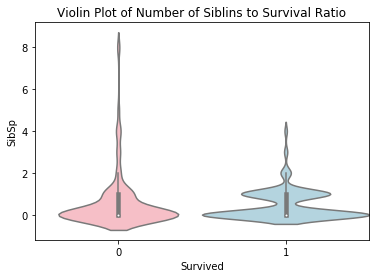

In [11]:
#Using a Violin Plot, as it is a cool way to visually see the data
SiblingPlot = sns.violinplot("Survived", "SibSp", data = train_data, palette = ["lightpink", "lightblue"], width = 1)

#Adding a Title for Readability 
SiblingPlot.set_title("Violin Plot of Number of Siblins to Survival Ratio")


Text(0.5, 1.0, 'Violin Plot of Number of Parents to Survival Ratio')

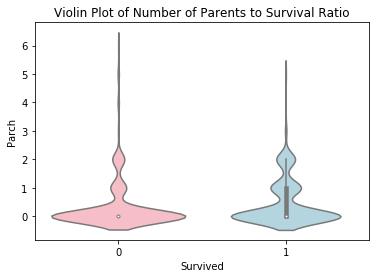

In [12]:
#Using a Violin Plot, as it is a cool way to visually see the data
ParentPlot = sns.violinplot("Survived", "Parch", data = train_data, palette = ["lightpink", "lightblue"])

#Adding a Title for Readability 
ParentPlot.set_title("Violin Plot of Number of Parents to Survival Ratio")


As this data shows us, the less siblings you have, the greater chance of survival. Interestingly enough though, it looks like not having any parents though does hurt your survival chances.

## <br>  **Data Preprocessing**

Now that we have explored the data, we need to preprocess it. This includes cleaning the data, dropping unused variables, and more. I will walk step by step on how to do this with the Titanic data.

### <br><u>Drop Data That is Not Needed<u>

In [13]:
#Dropping the Passenger ID Variable
train_data = train_data.drop(['PassengerId'], axis = 1)

#Chcek to See if PassengerId was Dropped:
train_data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### <br><u>Deal With Missing Data<u>

We are now going to find a way to deal with the missing data that was explored earlier. There are three variables that have some form of missing data. I will put this below with our code:
1. Cabin - 687 Missing Values
2. Embarked - 2 Missing Values
3. Age - 177 Missing Values

In [14]:
#Plot the Missing Data [Total Missing, Percentage Missing] With a Concatination of two Columns
Missing_Data = pd.concat([total, total_missing, Percent_Rounded], axis = 1, keys=['Non Missing Values', 'Total Missing Values', '% Missing'], sort=True)
Missing_Data

,Non Missing Values,Total Missing Values,% Missing
Age,714,177,19.9
Cabin,204,687,77.1
Embarked,889,2,0.2
Fare,891,0,0.0
Name,891,0,0.0
Parch,891,0,0.0
PassengerId,891,0,0.0
Pclass,891,0,0.0
Sex,891,0,0.0
SibSp,891,0,0.0


<br>**Missing Cabin Data**

Cabin has the most missing values out of any of the other 3 variables. Interestingly enought, the cabin varibale looks something like **G104**. Upon doing some research, the G stands for what level of the ship (what deck) they were staying on. This is a method to classify them numerically, as beforehand it was completely random. I will numerically assign each deck, and then set missing values to 0 in their own category.
<br> This is perhaps a feature that might be able to be left out of the final ML algorithms, but I would like to try it first with the Deck Classification.

In [15]:
#Import Python Regular Expression Librar
import re

#Set Deck Levels to Numeric Values
deck_level = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

#Set our Training & Testing Data for Efficiency
data = [train_data, test_data]

#Assign the Cabin Levels to their Numerical Value:
for dataset in data:
    
    #Setting Missing Values to U0
    dataset['Cabin'] = dataset['Cabin'].fillna('U0')
    
    #Use Regular Expresses to Create new 'Deck' Variable and Set to Deck Level in Cabin
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    
    #Sets the Deck Level to the Map Created above (Numerical Value)
    dataset['Deck'] = dataset['Deck'].map(deck_level)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    
    #Converts Deck Numerical Value from Float -> Integer 
    dataset['Deck'] = dataset['Deck'].astype(int)
    
#We can now see what this looks like
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,8
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,U0,Q,8
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,5
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U0,S,8
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U0,S,8
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,U0,C,8


Now that we have this Numerical Deck Variable, we will not need the Cabin Variable anymore. We will simply drop it below:

In [16]:
#Dropping the Cabin Feature in Both Datasets
train_data = train_data.drop(['Cabin'], axis = 1)
test_data = test_data.drop(['Cabin'], axis = 1)

#We can now see what this looks like
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,8
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,5
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,8
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,8
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,8


<br>**Missing Age Values**

Age has 177 missing values. There are a few ways to deal with this, but I think it is paramount that we keep Age as a feature, because I am assuming someones age drastically predicts their survival percentage in freezing cold water, or in life threatening situations. 

<br>My solution here is to create an area of random numbers, which are computed based on the mean age value in regards to the standard deviation and is_null. This way, we get a good estimate and spread on what people's statistical age is likely to be. If I wanted to make this even more perfect, we could build models based off of Deck, Age, Siblings, Sex, etc to predict age. This could perhaps be done in the future. 

In [17]:
#Set our Training & Testing Data for Efficiency
data = [train_data, test_data]

for dataset in data:
        #Calculating the Mean
        mean = train_data['Age'].mean()
        
        #Calculating the Standard Deviation 
        std = test_data['Age'].std()
        print('Mean of Testing Data: ',mean)
        print('Standard Deviation: ',std)
        
        #Now we Sum the Number of Null Values in the Age Feature
        Is_Null = dataset['Age'].isnull().sum()
        print('Number of Null Values: ',Is_Null)
        
        #Compute a Random Number between Mean, STD, and for Is_Null Values
        Random_Age = np.random.randint(mean - std, mean + std, size = Is_Null)
        print('Random Integer Values Generated: ',Random_Age)
        
        #Now we want to fill the Missing Calues in the Datasets with the Generated Numbers
        Age_Slice = dataset['Age'].copy()
        Age_Slice[np.isnan(Age_Slice)] = Random_Age
        dataset['Age'] = Age_Slice
        
        #Convert from Float -> Integer
        dataset['Age'] = train_data['Age'].astype(int)
    
#Let's Preview What this New Change Looks Like
train_data.head(10)

Mean of Testing Data:  29.69911764705882
Standard Deviation:  14.18120923562442
Number of Null Values:  177
Random Integer Values Generated:  [34 30 34 26 35 21 21 32 41 21 25 33 32 38 31 18 23 42 39 32 27 31 40 31
 22 22 28 18 40 24 33 16 42 28 35 34 18 25 31 21 37 19 24 17 33 40 42 16
 23 30 38 37 17 15 17 38 36 29 37 36 25 35 17 20 37 16 15 22 15 38 41 34
 33 36 42 20 35 34 24 38 26 17 38 25 23 34 31 35 21 37 25 16 18 32 39 39
 21 29 27 36 17 17 23 35 27 19 16 29 37 40 35 42 23 15 24 37 16 26 25 39
 21 17 37 16 37 20 30 24 17 39 23 15 23 26 36 20 39 19 22 39 34 32 23 29
 29 21 30 40 30 38 18 26 19 25 18 21 17 24 42 30 32 39 18 31 37 35 36 38
 31 18 16 15 37 20 32 17 21]
Mean of Testing Data:  29.374859708193043
Standard Deviation:  14.18120923562442
Number of Null Values:  86
Random Integer Values Generated:  [40 16 35 29 41 36 42 40 20 22 42 25 38 22 34 25 34 29 28 28 33 15 17 33
 25 42 33 36 16 37 21 34 41 36 19 23 31 42 35 30 38 42 16 42 26 18 38 31
 18 28 36 15 18 32 36 28 37 20

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,8
5,0,3,"Moran, Mr. James",male,34,0,0,330877,8.4583,Q,8
6,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,S,5
7,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,S,8
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,S,8
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,C,8


We now have no Missing Age Variables, and they are statistically likely to be in this range. Like I said eariler, this can definitely be improved in the future. 

<br> **Missing Embarked Features**

Luckily for us, the Embarked Variable only has 2 missing values. All we need to do is find the most common value and set it to these missing values. Like the age missing values, this could be improved by sorting through the data and seeing the trends between Embarked and other features, but for now this is a great way to do it

In [18]:
#The Describe Function let's us know the most common Value: S
train_data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
#The Most Common Port is S, so let's set the missing values to this
Top_Port = 'S'
data = [train_data, test_data]

#We will set it in a For Loop
for dataset in data:
        dataset['Embarked'] = dataset['Embarked'].fillna(Top_Port)

<br>**Let's Make Sure We Did it Right**

We've seen the code below before, so I won't comment it. But let's make sure we fixed all missing values.

In [20]:
total_missing = train_data.isnull().sum().sort_values(ascending=False)
total_missing.head(5)
total = train_data.notnull().sum().sort_values(ascending=False)
total.head(5)
Percent = train_data.isnull().sum()/train_data.isnull().count()*100
Percent.sort_values(ascending=False).head(5)
Percent_Rounded = (round(Percent,1)).sort_values(ascending=False)
Missing_Data = pd.concat([total, total_missing, Percent_Rounded], axis = 1, keys=['Non Missing Values', 'Total Missing Values', '% Missing'], sort=True)
Missing_Data

,Non Missing Values,Total Missing Values,% Missing
Age,891,0,0.0
Deck,891,0,0.0
Embarked,891,0,0.0
Fare,891,0,0.0
Name,891,0,0.0
Parch,891,0,0.0
Pclass,891,0,0.0
Sex,891,0,0.0
SibSp,891,0,0.0
Survived,891,0,0.0


We did it! Let's move on now to converting all features to Numerical Values so our Machine Learning Algorithms are able to properly work through the data.

### <br><u>Converting Features to Numeric:<u>

We are getting close to being able to analyze our data, but first we need to convert all of our features into Numerical Values and Categorize the data. I will first take a look at what variables we need to convert:

In [21]:
#Look at the Type & Number of Each Feature
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
Deck        891 non-null int32
dtypes: float64(1), int32(2), int64(4), object(4)
memory usage: 69.7+ KB


As we can see, Name, Sex, Fare, and Embarked are all character variables. Fare is a float value. Let's transform these!

<br>**Sex**

In [22]:
#We will set Zeros for Male, and Ones for Female
Gender = {'male': 0, 'female': 1}
data = [train_data, test_data]

for dataset in data:
        dataset['Sex'] = dataset['Sex'].map(Gender)
        
#Let's Preview What this New Change Looks Like
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,S,8
5,0,3,"Moran, Mr. James",0,34,0,0,330877,8.4583,Q,8
6,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51.8625,S,5
7,0,3,"Palsson, Master. Gosta Leonard",0,2,3,1,349909,21.0750,S,8
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27,0,2,347742,11.1333,S,8
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14,1,0,237736,30.0708,C,8


<br>**Fare**

In [24]:
# For fare all we need to do is convert to an Integrer
data = [train_data, test_data]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

#Let's Preview What this New Change Looks Like
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71,C,3
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53,S,3
4,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8,S,8


<br>**Ticket**

In [25]:
#Let's taka a look at what we can do with the ticket
train_data['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

Since there are 681 unique ticket values, we will drop it into the dataset.

In [28]:
#Dropping The Ticket Feature from Test/Train
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

#Let's Preview What this New Change Looks Like
train_data.head(5)

KeyError: "['Ticket'] not found in axis"

<br>**Embarked**

In [30]:
##We need to convert Embarked to a Numeric Feature
Port = {'S': 0, 'C': 1, 'Q': 2}
data = [train_data, test_data]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(Port)
    
#Let's Preview What this New Change Looks Like
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,1,3
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0,3
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8,0,8


<br>**Name**

The only way to make the Name Feature classified is to pull the title (Mr., Mrs. Etc.). We will convert these values into numerical categories

In [34]:
data = [train_data, test_data]
Title = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    #Extra the Title using Regex
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    #Replace Uncommon Titles with Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    #Replacing Additional Uncommon Titles with More Common Titles
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    #Convert the Titles into Numerical Values
    dataset['Title'] = dataset['Title'].map(Title)
    
    #Filling any Missing Title with Zero (Safeguard)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    
#Let's Preview What this New Change Looks Like
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7,0,8,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71,1,3,3
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7,0,8,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53,0,3,3
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8,0,8,1


In [35]:
#We can now drop the Name Variable
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

#Let's Preview What this New Change Looks Like
train_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,7,0,8,1
1,1,1,1,38,1,0,71,1,3,3
2,1,3,1,26,0,0,7,0,8,2
3,1,1,1,35,1,0,53,0,3,3
4,0,3,0,35,0,0,8,0,8,1


### <br> <u>Creating Categories: